# Length of stay in the ICU

This document shows how Jupyter Notebooks can be used to create a reproducible analysis using MIMIC-III. Let's calculate the median length of stay in the ICU and then include this value in our Notebook.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import getpass
%matplotlib inline
plt.style.use('ggplot') 

In [2]:
# Create a database connection
user = 'postgres'
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii_demo'

In [3]:
# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host, 
                       password=getpass.getpass(prompt='Password:'.format(user)))
cur = con.cursor()
cur.execute('SET search_path to {}'.format(schema))

Password:········


In [4]:
# Get length of stay from the icustays table
query = \
"""
SELECT i.subject_id, i.hadm_id, i.los
FROM icustays i;
"""

data = pd.read_sql_query(query,con)

In [5]:
# Display the first few rows of the data
data.head()

,subject_id,hadm_id,los
0,10006,142345,1.6325
1,10011,105331,13.8507
2,10013,165520,2.6499
3,10017,199207,2.1436
4,10019,177759,1.2938


In [6]:
# Compute the median LOS
avg_los = data.los.median()
print(avg_los)

2.11145


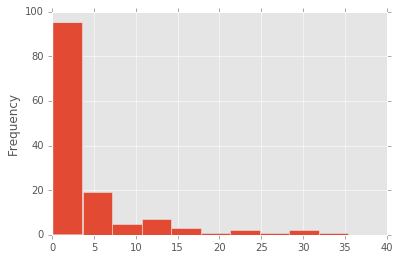

In [7]:
# Plot the distribution
data.los.plot(kind='hist')